In [15]:
%matplotlib inline

from azureml import Workspace
import pandas as pd
import numpy as np

ws = Workspace()
ds = ws.datasets['breast-cancer-wisconsin.csv']
bc = ds.to_dataframe()

bc.columns = ['ID','Radius','Texture','Perimeter','Area','Smoothness','Compactness','Concavity','Concave_Points','Symmetry','Fractal_Dimension']

print(bc)

          ID  Radius  Texture  Perimeter  Area  Smoothness Compactness  \
0    1000025       5        1          1     1           2           1   
1    1002945       5        4          4     5           7          10   
2    1015425       3        1          1     1           2           2   
3    1016277       6        8          8     1           3           4   
4    1017023       4        1          1     3           2           1   
5    1017122       8       10         10     8           7          10   
6    1018099       1        1          1     1           2          10   
7    1018561       2        1          2     1           2           1   
8    1033078       2        1          1     1           2           1   
9    1033078       4        2          1     1           2           1   
10   1035283       1        1          1     1           1           1   
11   1036172       2        1          1     1           2           1   
12   1041801       5        3         

In [19]:
## Convert some lumns to numberic values
cols = ['Compactness']
bc[cols] = bc[cols].apply(pd.to_numeric, args=('coerce',))

## Remove rows with missing values
bc.dropna(axis=0, inplace = True)

bc.dtypes

ID                     int64
Radius                 int64
Texture                int64
Perimeter              int64
Area                   int64
Smoothness             int64
Compactness          float64
Concavity              int64
Concave_Points         int64
Symmetry               int64
Fractal_Dimension      int64
dtype: object

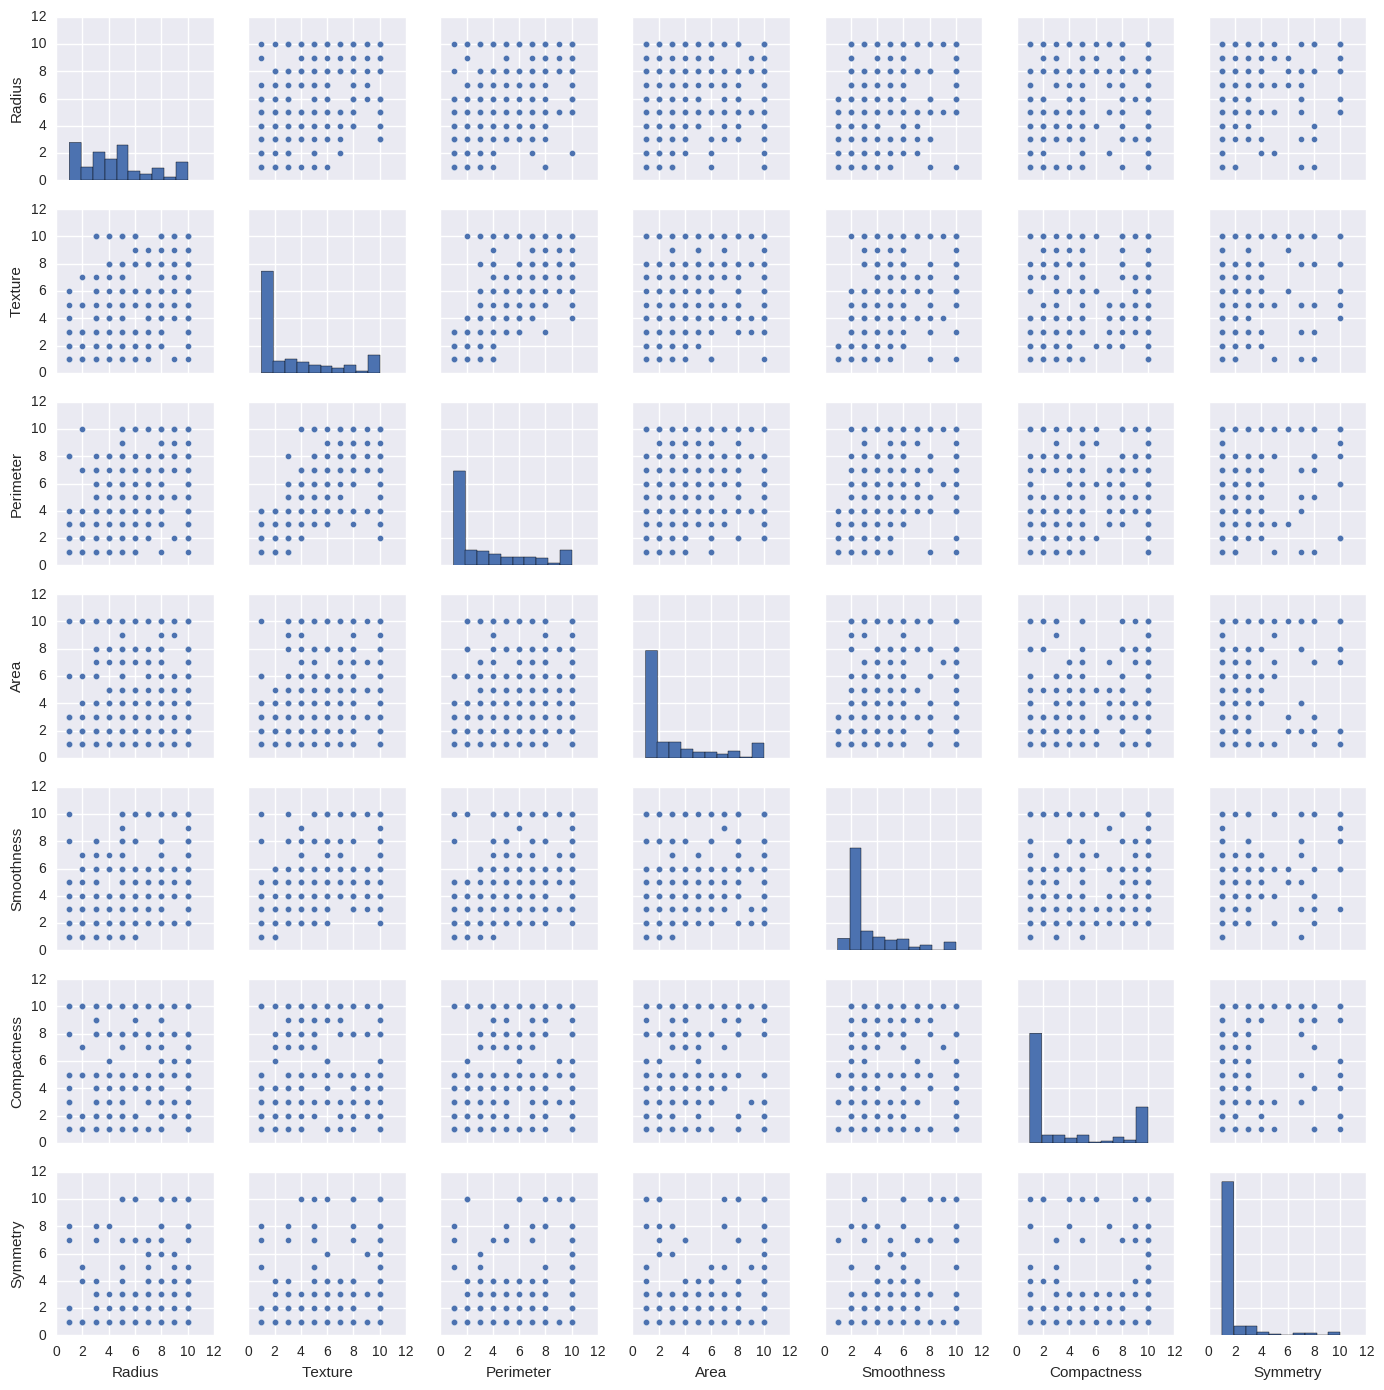

In [23]:
import seaborn as sns
num_cols = ["Radius","Texture","Perimeter","Area","Smoothness","Compactness","Symmetry"]
sns.pairplot(bc[num_cols], size=2)

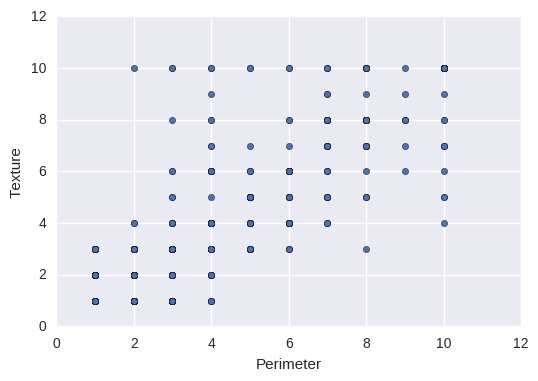

In [24]:
bc.plot(x = 'Perimeter', y='Texture', kind = 'Scatter')

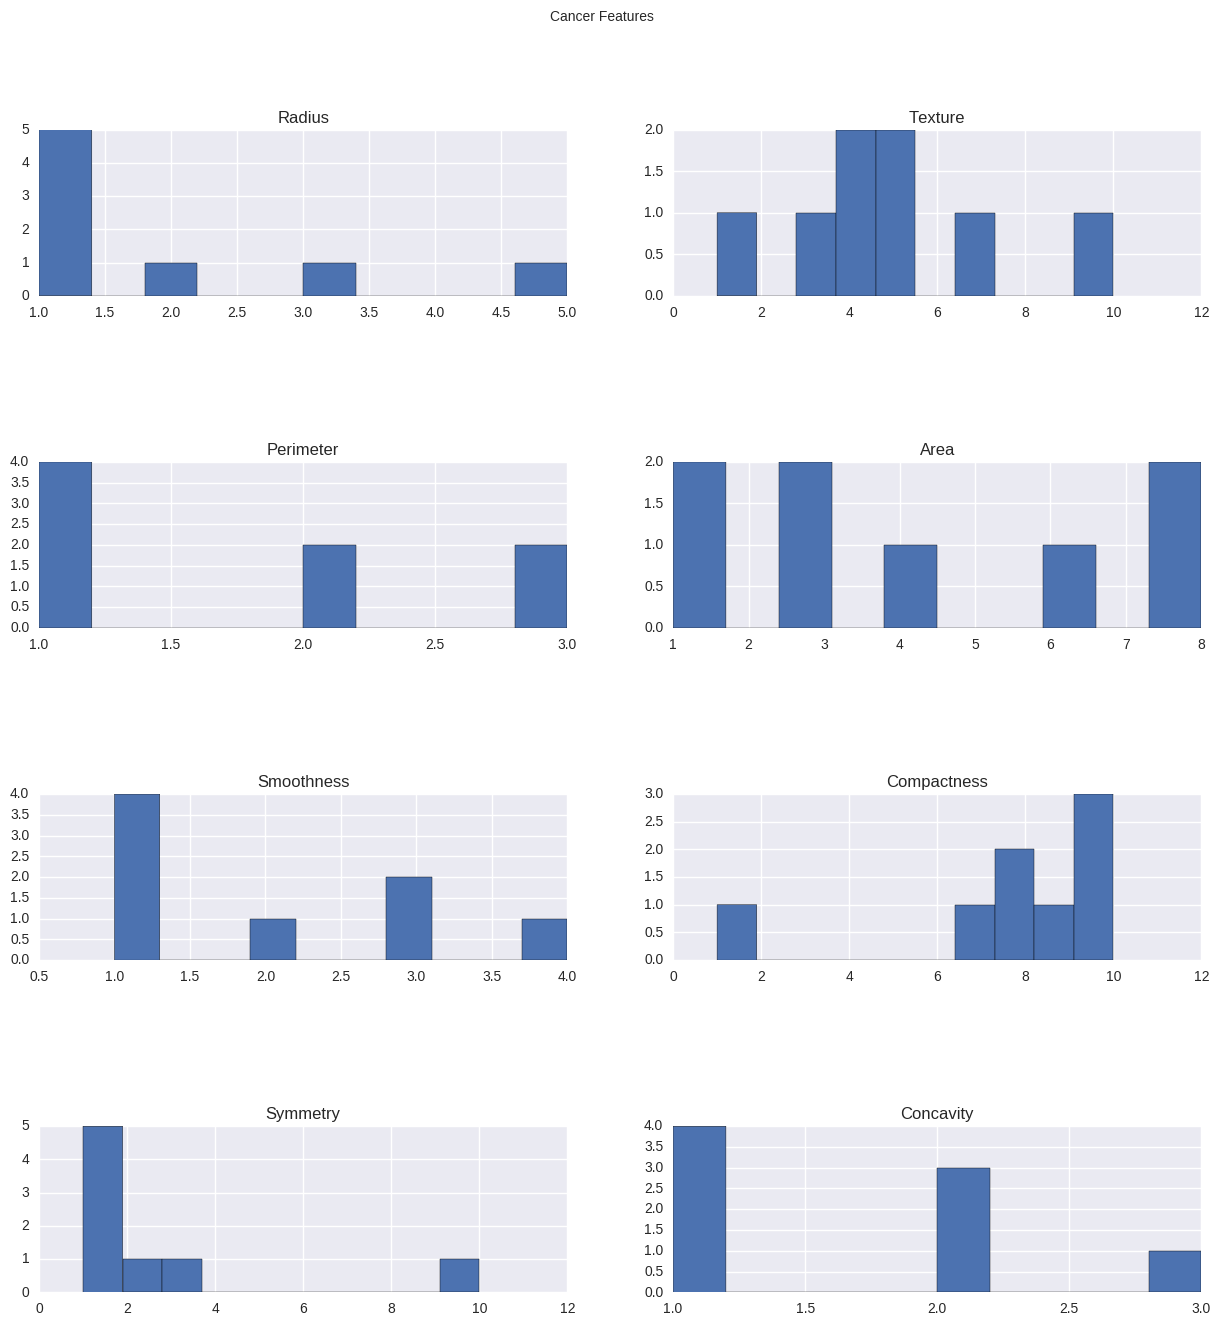

In [44]:
## Function to plot conditioned histograms
import matplotlib.pyplot as plt
num_cols = ["Radius","Texture","Perimeter","Area","Smoothness","Compactness","Symmetry", "Concavity"]
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15,15))
fig.subplots_adjust(hspace=1)
fig.suptitle('Cancer Features')
for ax, feature, name in zip(axes.flatten() , bc[num_cols].values, num_cols):
    ax.hist(feature)
    ax.set(title=name)


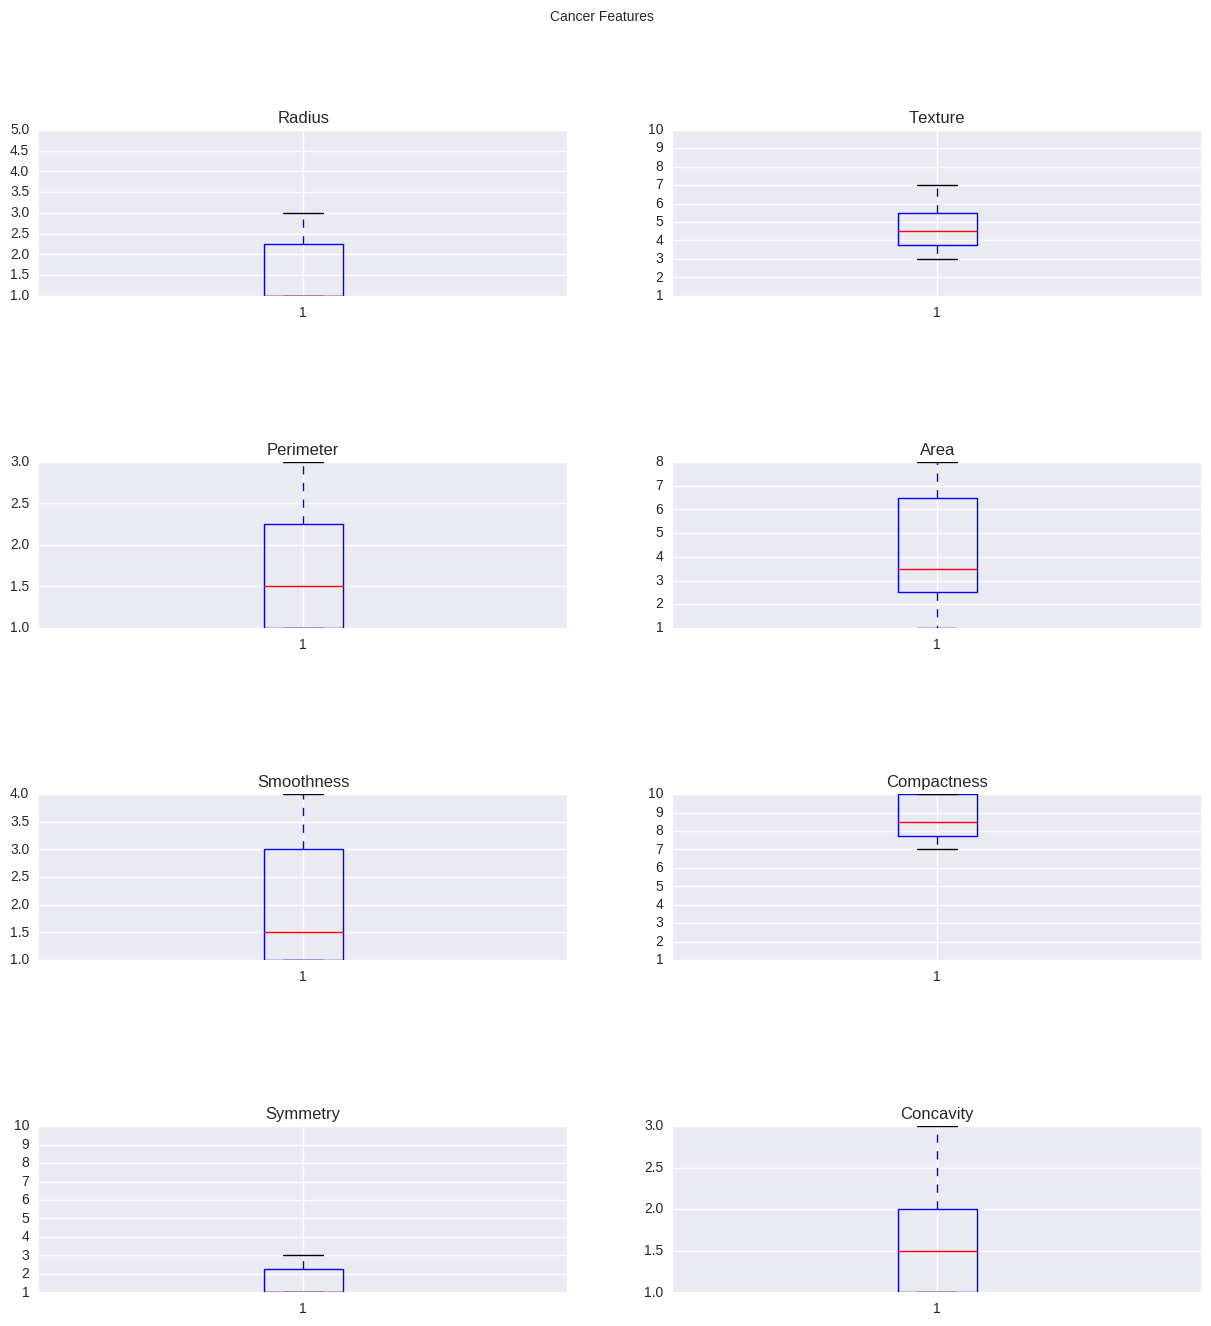

In [45]:
import matplotlib.pyplot as plt
num_cols = ["Radius","Texture","Perimeter","Area","Smoothness","Compactness","Symmetry", "Concavity"]
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15,15))
fig.subplots_adjust(hspace=1)
fig.suptitle('Cancer Features')
for ax, feature, name in zip(axes.flatten() , bc[num_cols].values, num_cols):
    ax.boxplot(feature)
    ax.set(title=name)

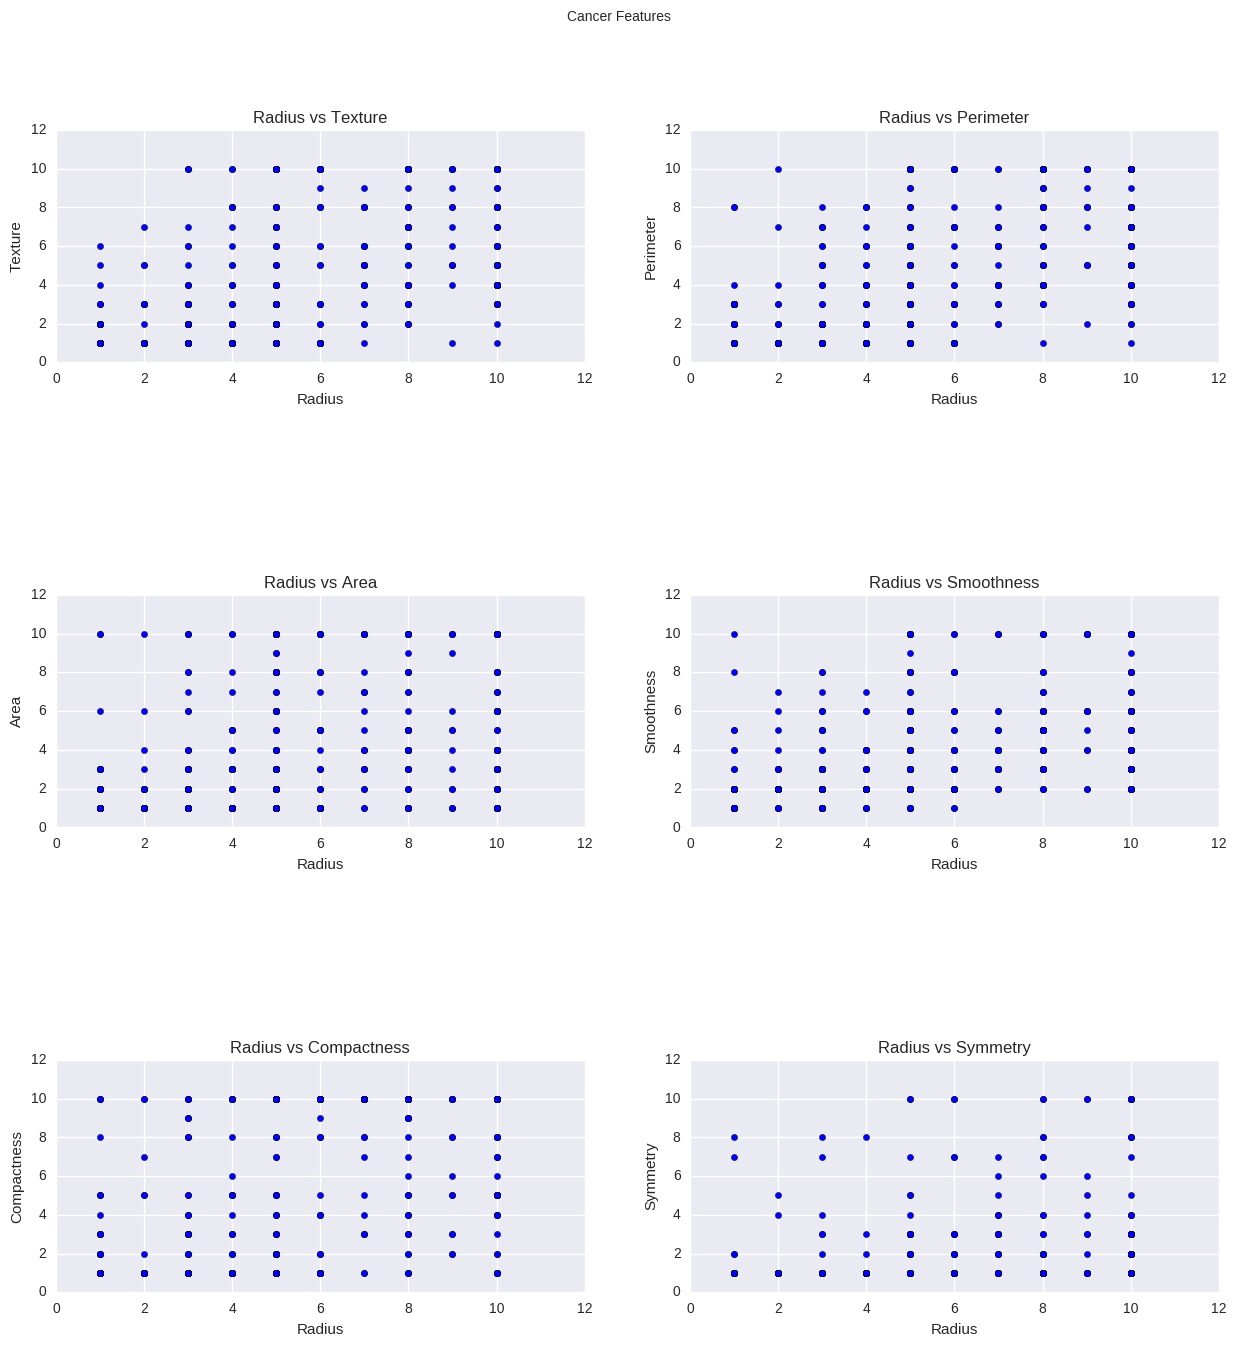

In [80]:
import matplotlib.pyplot as plt
num_cols = ["Texture","Perimeter","Area","Smoothness","Compactness","Symmetry"]
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15,15))
fig.subplots_adjust(hspace=1)
fig.suptitle('Cancer Features')
axes = axes.ravel()
i = 0
for col in num_cols:
        axes[i].scatter(x=bc['Radius'].values, y=bc[col].values)
        axes[i].set(title='Radius vs {}'.format(col))
        axes[i].set_ylabel(col)
        axes[i].set_xlabel('Radius')
        i += 1